In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'C:/Tina Lin/Training/DSI/Week14_Visualization/Assignments/Assignment4/covidtesting.xlsx'
covid_data = pd.ExcelFile(file_path)

# Inspect the sheet names to understand the structure of the Excel file
sheet_names = covid_data.sheet_names
sheet_names


['covidtesting']

In [ ]:
# Load the data from the 'covidtesting' sheet
data = covid_data.parse('covidtesting')

# Display the first few rows to understand its structure
data.head()

# The dataset contains several columns, including:
# Date-related data: Reported Date
# Testing results: Confirmed Negative, Presumptive Positive, Confirmed Positive
# Health outcomes: Resolved, Deaths, Newly Reported Deaths
# Long-Term Care (LTC) specific data: Total Positive LTC Resident Cases, Total LTC Resident Deaths
# Variants and other derived metrics: Lineage-specific totals for Alpha, Beta, Gamma, Delta.

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Deaths_New_Methodology,Total Cases,Total patients approved for testing as of Reporting Date,...,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7_Alpha,Total_Lineage_B.1.351_Beta,Total_Lineage_P.1_Gamma,Total_Lineage_B.1.617.2_Delta,deaths_data_cleaning,newly_reported_deaths
0,2020-02-06,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-07,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-08,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-09,NaN,NaN,0.0,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-10,NaN,NaN,0.0,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clean and Prepare the Data

# Convert 'Reported Date' to datetime and check for missing values
data['Reported Date'] = pd.to_datetime(data['Reported Date'], errors='coerce')

# Drop rows with all NaN values and summarize missing data
cleaned_data = data.dropna(how='all')
missing_summary = cleaned_data.isnull().sum()

cleaned_data.info(), missing_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              1151 non-null   datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         1149 non-null   float64       
 5   Resolved                                                   1139 non-null   float64       
 6   Deaths                                                     724 non-null    float64       
 7   Deaths_New_Methodology           

(None,
 Reported Date                                                   0
 Confirmed Negative                                           1104
 Presumptive Negative                                         1139
 Presumptive Positive                                         1126
 Confirmed Positive                                              2
 Resolved                                                       12
 Deaths                                                        427
 Deaths_New_Methodology                                        764
 Total Cases                                                     2
 Total patients approved for testing as of Reporting Date        6
 Total tests completed in the last day                          69
 Percent positive tests in last day                             73
 Under Investigation                                             0
 Number of patients hospitalized with COVID-19                  56
 Number of patients in ICU due to COVID-19             

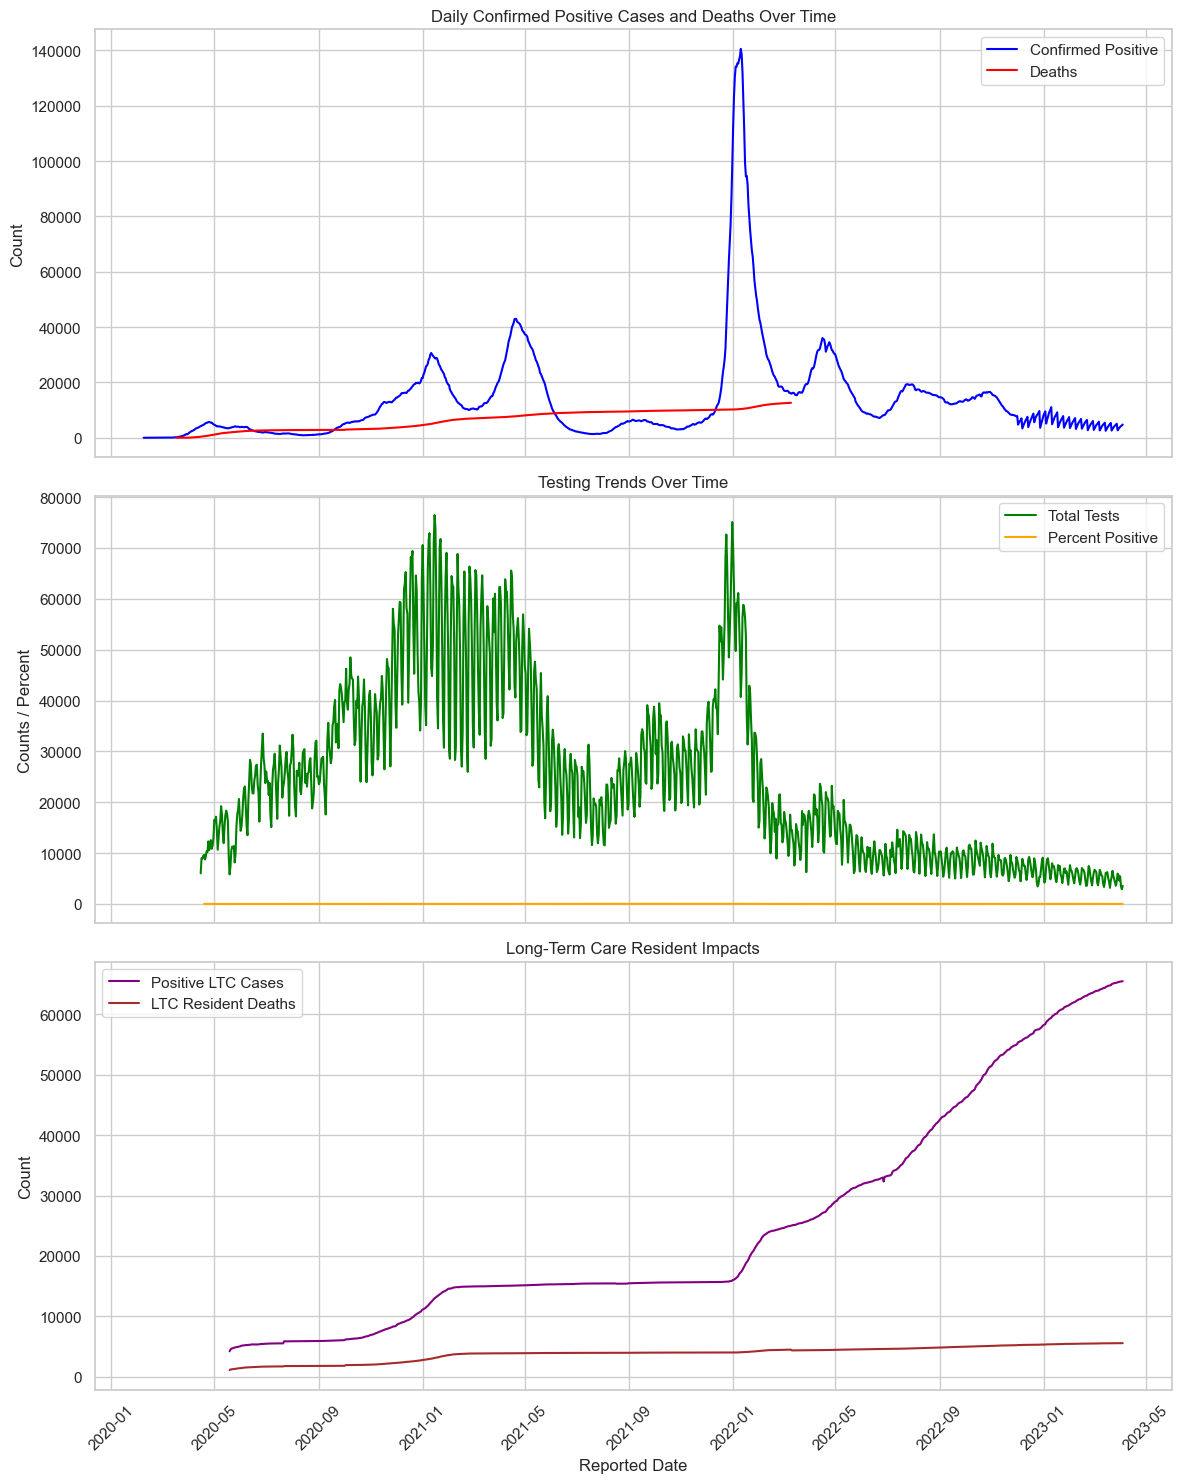

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# Focus on relevant columns for visualization
selected_data = cleaned_data[['Reported Date', 'Confirmed Positive', 'Deaths', 
                              'Total tests completed in the last day', 'Percent positive tests in last day',
                              'Total Positive LTC Resident Cases', 'Total LTC Resident Deaths']]

# Drop rows where 'Reported Date' is missing to focus on time-series visualizations
selected_data = selected_data.dropna(subset=['Reported Date'])

# Generate time-series plots for the selected metrics
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot 1: Daily confirmed positive cases and deaths over time
sns.lineplot(data=selected_data, x='Reported Date', y='Confirmed Positive', ax=axes[0], label='Confirmed Positive', color='blue')
sns.lineplot(data=selected_data, x='Reported Date', y='Deaths', ax=axes[0], label='Deaths', color='red')
axes[0].set_title('Daily Confirmed Positive Cases and Deaths Over Time')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot 2: Testing trends - completed tests and positivity rate
sns.lineplot(data=selected_data, x='Reported Date', y='Total tests completed in the last day', ax=axes[1], label='Total Tests', color='green')
sns.lineplot(data=selected_data, x='Reported Date', y='Percent positive tests in last day', ax=axes[1], label='Percent Positive', color='orange')
axes[1].set_title('Testing Trends Over Time')
axes[1].set_ylabel('Counts / Percent')
axes[1].legend()

# Plot 3: Long-term care impacts - positive cases and deaths
sns.lineplot(data=selected_data, x='Reported Date', y='Total Positive LTC Resident Cases', ax=axes[2], label='Positive LTC Cases', color='purple')
sns.lineplot(data=selected_data, x='Reported Date', y='Total LTC Resident Deaths', ax=axes[2], label='LTC Resident Deaths', color='brown')
axes[2].set_title('Long-Term Care Resident Impacts')
axes[2].set_ylabel('Count')
axes[2].legend()

# Format the x-axis for all plots
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
